<a href="https://colab.research.google.com/github/butchland/fastai_xla_extensions/blob/master/samples/TabularTrainingTPUdemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course19.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
!pip install -Uqq fastcore --upgrade
!pip install -Uqq fastai --upgrade
!pip install -Uqq git+https://github.com/butchland/fastai_xla_extensions.git

In [3]:
!pip install -Uqq cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.7-cp36-cp36m-linux_x86_64.whl
# VERSION = "20200325" #@param ["1.5" , "20200707", "20200325", "nightly"]
# !curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py > /dev/null
# !python pytorch-xla-env-setup.py --version $VERSION > /dev/null

     |████████████████████████████████| 133.6MB 37kB/s 
     |████████████████████████████████| 61kB 3.3MB/s 


In [4]:
!pip freeze | grep torch
!pip freeze | grep fast

torch==1.7.0+cu101
torch-xla==1.7
torchsummary==1.5.1
torchtext==0.3.1
torchvision==0.8.1+cu101
fastai==2.1.8
fastai-xla-extensions==0.0.3
fastcore==1.3.11
fastdtw==0.3.4
fastprogress==1.0.0
fastrlock==0.5


In [5]:
from fastai.tabular.all import *
import fastai_xla_extensions.core

In [7]:
path = untar_data(URLs.ADULT_SAMPLE)
Path.BASE_PATH = path
df = pd.read_csv(path/'adult.csv')

In [8]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])
dls.device

device(type='cpu')

In [9]:
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,accuracy,time
0,0.370146,0.352606,0.836609,00:30
1,0.362642,0.357105,0.835688,00:28
2,0.355451,0.348199,0.840602,00:26
3,0.363875,0.352099,0.840602,00:28
4,0.361783,0.347847,0.835074,00:27
5,0.346440,0.344303,0.841984,00:27
6,0.350695,0.342578,0.840141,00:28
7,0.339639,0.347184,0.837991,00:28
8,0.340506,0.344752,0.837377,00:27
9,0.338694,0.345187,0.841677,00:27


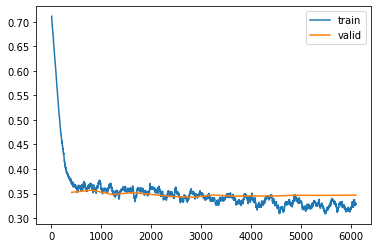

In [10]:
learn.recorder.plot_loss()

In [11]:
learn.predict(df.iloc[0])

(   workclass  education  marital-status  ...    fnlwgt  education-num  salary
 0        0.0        0.0             0.0  ... -0.844486       0.755058     0.0
 
 [1 rows x 11 columns], tensor(0), tensor([0.8706, 0.1294]))

In [12]:
test_df = df.copy()
test_df.drop(['salary'], axis=1, inplace=True)
dl = learn.dls.test_dl(test_df)
learn.get_preds(dl=dl)

(tensor([[0.8706, 0.1294],
         [0.7340, 0.2660],
         [0.9251, 0.0749],
         ...,
         [0.8529, 0.1471],
         [0.8719, 0.1281],
         [0.9427, 0.0573]]), None)

In [13]:
learn.dls.device

device(type='xla', index=1)